In [1]:
import warnings
import datetime
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'


In [2]:

# Membaca dataset dari file CSV
data = pd.read_csv('https://raw.githubusercontent.com/omidiyanto/konversiMK-oceanografi/main/sea_levels_2015.csv')
print("Shape of the Dataframe: ", data.shape)
data.head()



Shape of the Dataframe:  (1608, 3)


,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


In [3]:
# Formatting the date column correctly
data['Time'] = pd.to_datetime(data['Time'])
data.info()

ts = data[['Time', 'GMSL']].copy()
ts = ts.set_index('Time')
ts = ts.resample('MS').mean()  # Resample to monthly frequency

#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              1608 non-null   datetime64[ns]
 1   GMSL              1608 non-null   float64       
 2   GMSL uncertainty  1608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.8 KB


In [4]:
# Fit SARIMAX model
mod = sm.tsa.SARIMAX(ts['GMSL'],
                     order=(2, 0, 4),
                     seasonal_order=(3, 1, 2, 12),
                     enforce_stationarity=False,
                     enforce_invertibility=False)
results = mod.fit()



Format YYYY-MM-DD
1.Masukkan tanggal mulai : 1980-01-01
2.Masukkan tanggal akhir : 2025-01-01


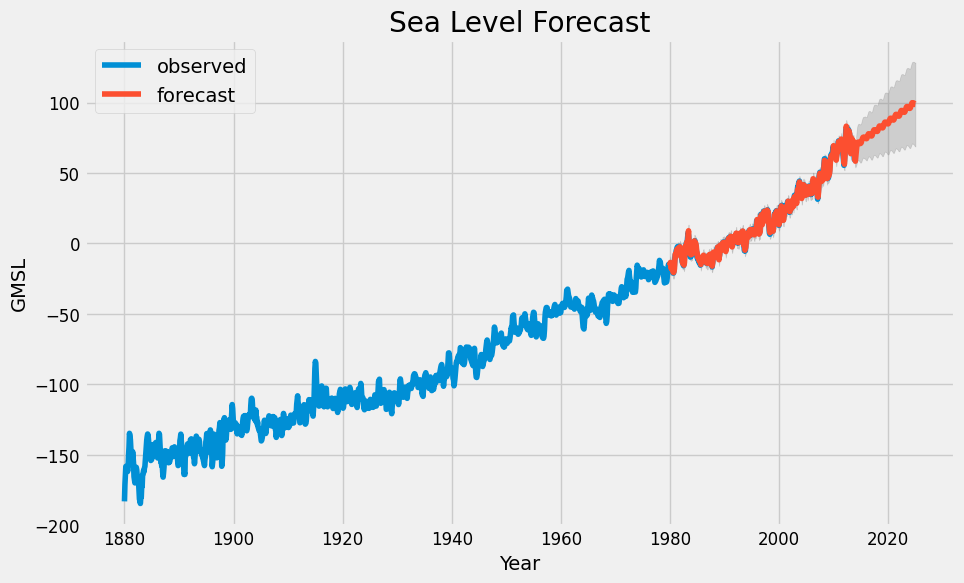

In [6]:
import numpy as np
# Make predictions
print("Format YYYY-MM-DD")
start_time=input("1.Masukkan tanggal mulai : ")
end_time=input("2.Masukkan tanggal akhir : ")
forecast = results.get_prediction(start=pd.to_datetime(start_time), end=pd.to_datetime(end_time), dynamic=False)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 6))
plt.plot(ts.index, ts['GMSL'], label='observed')
plt.plot(forecast.predicted_mean, label='forecast')
plt.fill_between(forecast_ci.index, np.array(forecast_ci.iloc[:, 0]), np.array(forecast_ci.iloc[:, 1]), color='gray', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('GMSL')
plt.title('Sea Level Forecast')
plt.legend()
plt.show()
